In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import zipfile

# Define the path to your zip file
zip_file_path = "/content/archive (2).zip"

# Define the path to the CSV file within the zip archive
csv_file_path = "heart.csv"  # Replace with the actual file name if different

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file to a temporary location
    zip_ref.extract(csv_file_path)

# Load the extracted CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [7]:
# 10 random rows from dataset
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1


In [8]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [9]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 303 rows and 14 columns.


In [10]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df.drop(columns=['sex', 'target'], axis = 1).describe()


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [12]:
df[(df['ca'] > 3) | (df['thal'] == 0)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [13]:
# dataset will be

df = df[~((df['ca'] > 3) | (df['thal'] == 0))].copy()
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.shape


(296, 14)

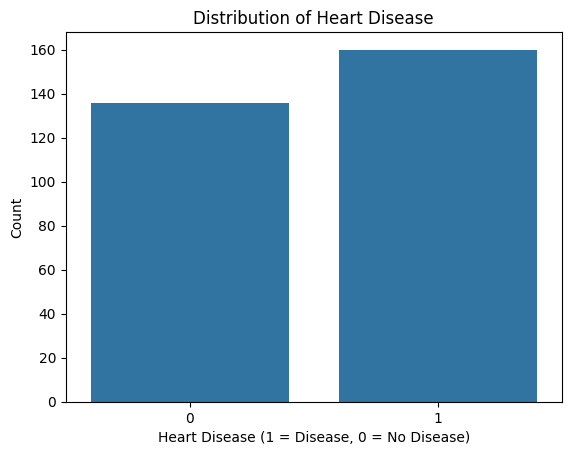

In [15]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Disease, 0 = No Disease)')
plt.ylabel('Count')
plt.show()

In [16]:
# # Plotting each feature with corresponds to all other features
# sns.pairplot(df, hue = 'target')
# plt.show()


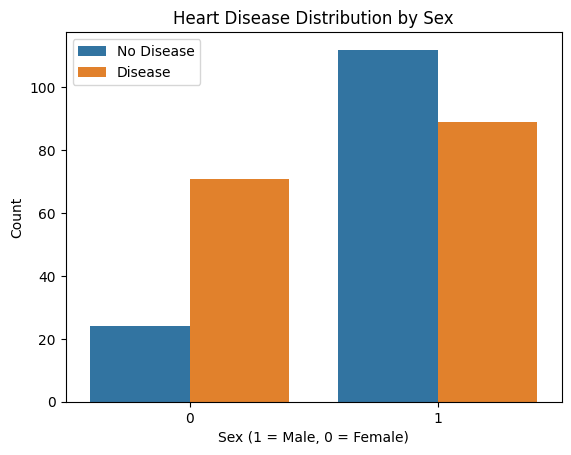

In [17]:
# Plot the distribution of heart disease by sex
sns.countplot(x = 'sex', hue = 'target', data = df)
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()


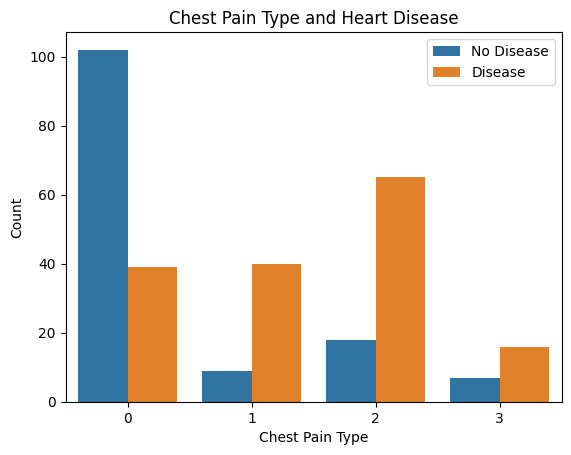

In [18]:
# Plot distribution of chest pain types in relation to heart disease
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()


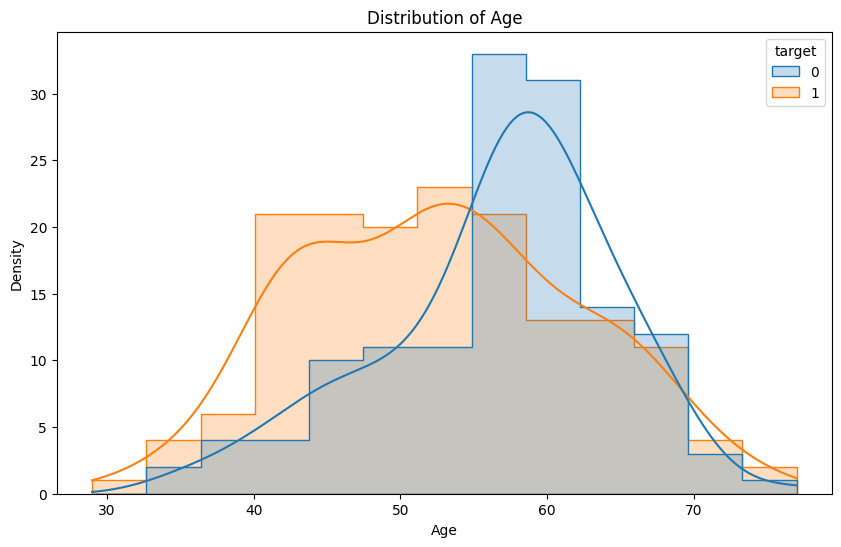

In [19]:
# Plot the distribution of Age w.r.t heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = 'age', hue='target', kde=True, element='step')
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

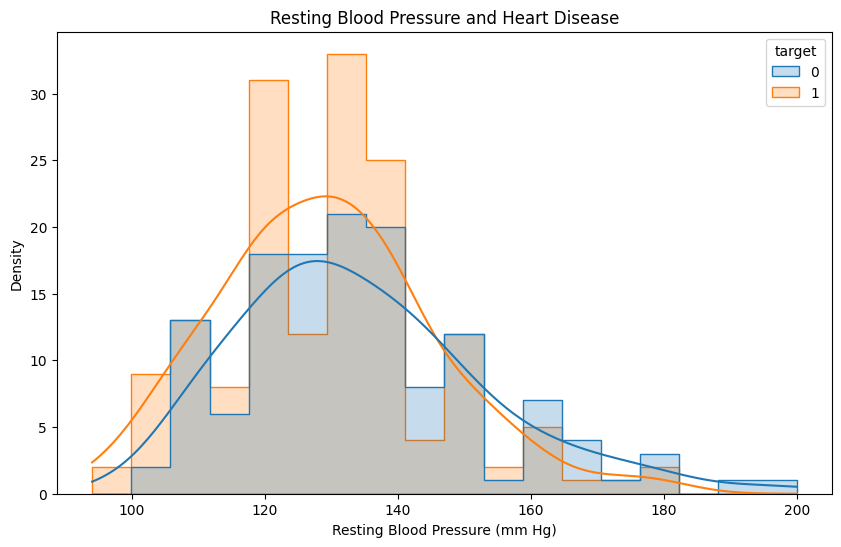

In [20]:
# Distribution of trestbps with respect to heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trestbps', hue='target', kde=True, element='step')
plt.title('Resting Blood Pressure and Heart Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Density')
plt.show()


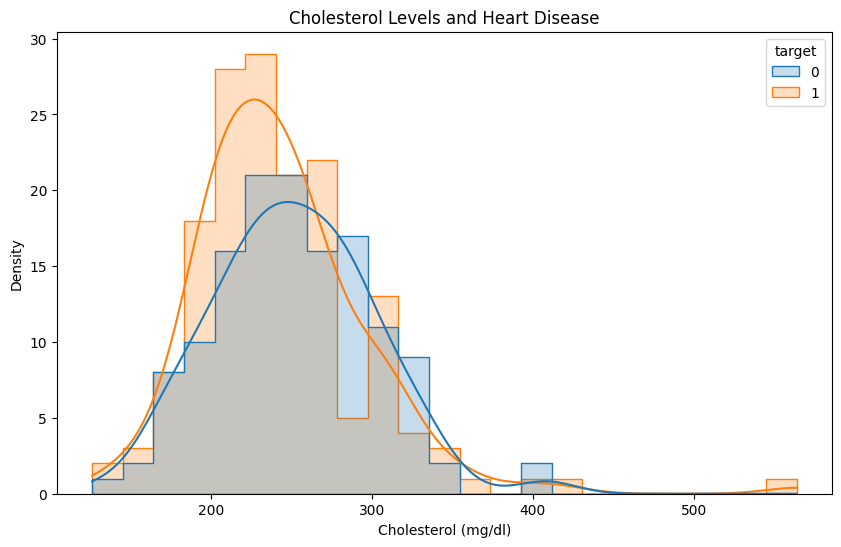

In [21]:
# Distribution of cholesterol with respect to heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='target', kde=True, element='step')
plt.title('Cholesterol Levels and Heart Disease')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Density')
plt.show()


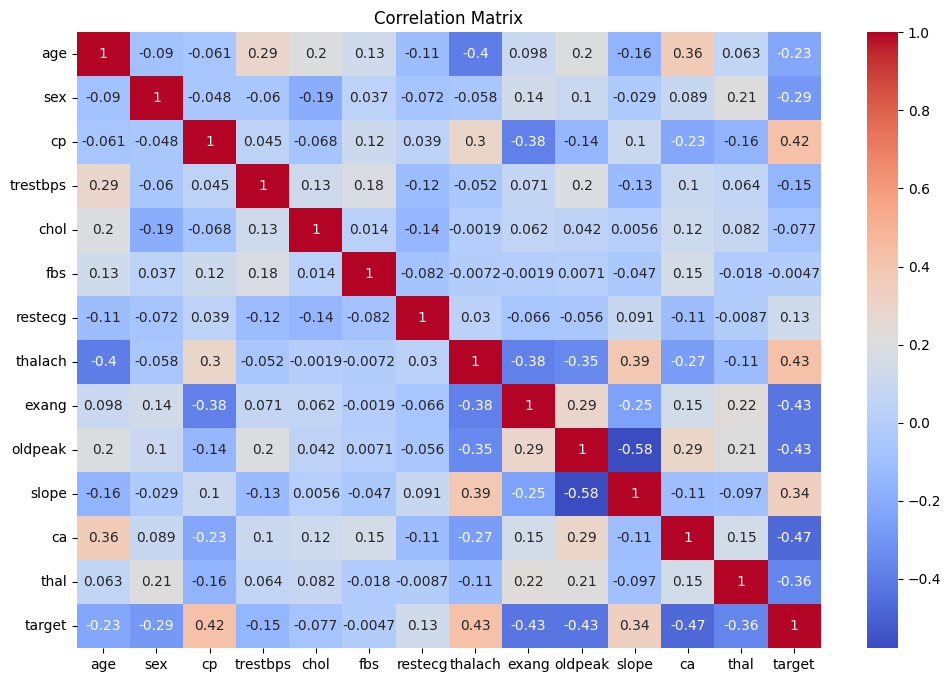

In [22]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


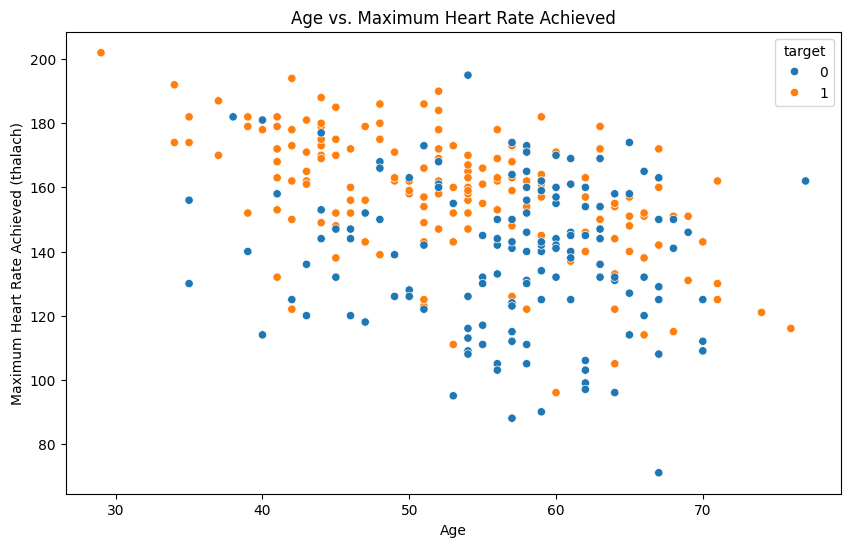

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title("Age vs. Maximum Heart Rate Achieved")
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()


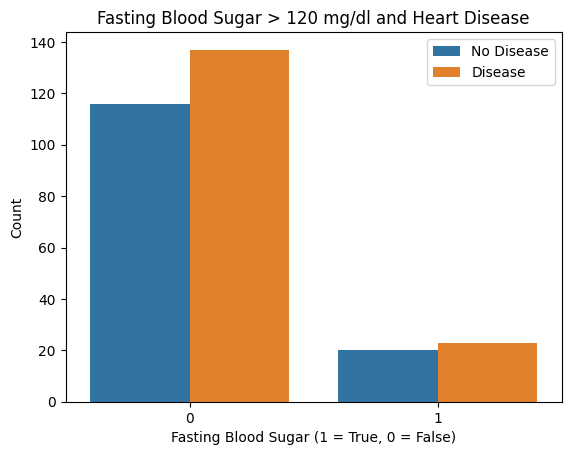

In [24]:
# Plot distribution of heart disease by fasting blood sugar
sns.countplot(x='fbs', hue='target', data=df)
plt.title('Fasting Blood Sugar > 120 mg/dl and Heart Disease')
plt.xlabel('Fasting Blood Sugar (1 = True, 0 = False)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

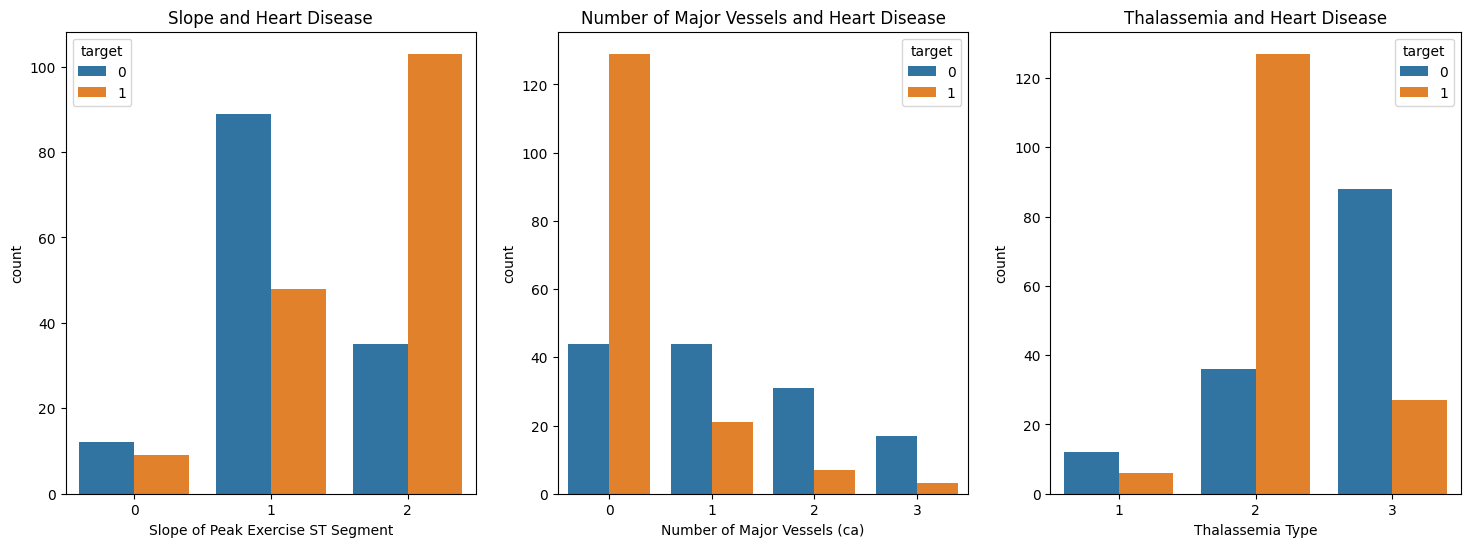

In [25]:
# Plot distribution of slope, ca, and thal with heart disease
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='slope', hue='target', data=df, ax=ax[0])
ax[0].set_title('Slope and Heart Disease')
ax[0].set_xlabel('Slope of Peak Exercise ST Segment')

sns.countplot(x='ca', hue='target', data=df, ax = ax[1])
ax[1].set_title('Number of Major Vessels and Heart Disease')
ax[1].set_xlabel('Number of Major Vessels (ca)')

sns.countplot(x='thal', hue='target', data=df, ax = ax[2])
ax[2].set_title('Thalassemia and Heart Disease')
ax[2].set_xlabel('Thalassemia Type')
plt.show()

In [26]:
X = df.drop('target', axis=1)
y = df['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
print(f"The size of the train set is {X_train.shape} and test set is {X_test.shape}.")


The size of the train set is (236, 13) and test set is (60, 13).


In [28]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [29]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()

In [30]:
lr.fit(X_train, y_train)
knn.fit(X_train_stand, y_train)
svc.fit(X_train, y_train)

SVC()

In [31]:
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test_stand)
y_pred_svc = svc.predict(X_test)

print(f"Accuracy of Logistic Regression : {accuracy_score(y_test, y_pred_lr) *100}%")
print(f"Accuracy of KNN : {accuracy_score(y_test, y_pred_knn) *100}%")
print(f"Accuracy of SVC : {accuracy_score(y_test, y_pred_svc) *100}%")

Accuracy of Logistic Regression : 90.0%
Accuracy of KNN : 88.33333333333333%
Accuracy of SVC : 75.0%


In [32]:
for model in [lr, knn, svc]:
    print(f"Accuracy of {model.__class__.__name__} for 5 folds is : {np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=5)) *100}%")

Accuracy of LogisticRegression for 5 folds is : 85.80790960451978%
Accuracy of KNeighborsClassifier for 5 folds is : 65.89830508474577%
Accuracy of SVC for 5 folds is : 66.2316384180791%


In [33]:
for model in [lr, knn, svc]:
    print(f"The recall score of {model.__class__.__name__} for 5 folds is : {np.mean(cross_val_score(model, X, y, scoring='recall', cv=5))*100}%")

The recall score of LogisticRegression for 5 folds is : 91.875%
The recall score of KNeighborsClassifier for 5 folds is : 73.125%
The recall score of SVC for 5 folds is : 84.375%


In [34]:
# Random forest is a tree based model, which doesn't require scaling.
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rf.predict(X_test)
print(f"Accuracy Score of {rf.__class__.__name__} is {accuracy_score(y_test, y_pred) * 100}%")
print(f"Recall Score of {rf.__class__.__name__} is {recall_score(y_test, y_pred) * 100}%")
print(f"Precision Score of {rf.__class__.__name__} is {precision_score(y_test, y_pred) * 100}%")

Accuracy Score of RandomForestClassifier is 86.66666666666667%
Recall Score of RandomForestClassifier is 93.75%
Precision Score of RandomForestClassifier is 83.33333333333334%


In [36]:
# Performing 5 Fold Cross Validation
print(f"Recall Score of {rf.__class__.__name__} is {np.mean(cross_val_score(rf, X, y, cv=5,scoring='recall')) * 100}%")

Recall Score of RandomForestClassifier is 82.5%


In [37]:
# for logistic regression
logistic_regression = LogisticRegression(solver='liblinear')  # Use 'liblinear' for small datasets

# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [38]:
# Grid Search for Logistic Regression, scoring = recall
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=5, scoring='recall')
grid_search_lr.fit(X_train, y_train)  # X_train and y_train are the training data

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.9295384615384616


In [39]:
random_forest = RandomForestClassifier()

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
# Randomized Search for Random Forest

random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='recall', random_state=42)
random_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best score for Random Forest:", random_search_rf.best_score_)

Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Best score for Random Forest: 0.9055384615384616


In [41]:
log_reg = LogisticRegression(solver='liblinear', C=0.1, penalty='l2')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(f"Accuracy Score of {log_reg.__class__.__name__} is {accuracy_score(y_test, y_pred) * 100}%")
print(f"Recall Score of {log_reg.__class__.__name__} is {recall_score(y_test, y_pred) * 100}%")
print(f"Precision Score of {log_reg.__class__.__name__} is {precision_score(y_test, y_pred) * 100}%")

Accuracy Score of LogisticRegression is 86.66666666666667%
Recall Score of LogisticRegression is 93.75%
Precision Score of LogisticRegression is 83.33333333333334%


In [42]:
# but we want high recall score, which is
print(f"Recall Score of {log_reg.__class__.__name__} is {recall_score(y_test, y_pred) * 100}%")

Recall Score of LogisticRegression is 93.75%
